In [1]:
import pandas as pd
import datetime as dt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
from statsmodels.tsa.api import VARMAX
import matplotlib.pyplot as plt


In [2]:
# Load and preprocess data
start = dt.datetime(2021, 7, 1)
end = dt.datetime(2022, 1, 27)
symbol = 'AXISBANK.NS'

stk_data = yf.download(symbol, start=start, end=end)
stk_data = stk_data[["Open", "High", "Low", "Close"]]

[*********************100%%**********************]  1 of 1 completed


In [3]:
stk_data

,Open,High,Low,Close
Date,,,,
2021-07-01,750.000000,754.400024,744.500000,746.450012
2021-07-02,747.599976,752.849976,744.000000,750.650024
2021-07-05,757.099976,762.000000,753.400024,760.349976
2021-07-06,757.000000,767.000000,755.200012,758.349976
2021-07-07,755.900024,764.000000,752.250000,762.900024
...,...,...,...,...
2022-01-19,725.200012,731.950012,718.700012,729.599976
2022-01-20,731.049988,737.150024,722.150024,728.900024
2022-01-21,722.000000,725.250000,708.049988,712.500000


In [4]:
# Define rmsemape function
def rmsemape(y_Test, predicted_stock_price_test_ori):
    mse = mean_squared_error(y_Test, predicted_stock_price_test_ori)
    rmse = np.sqrt(mse)
    print("RMSE-Testset:", rmse)
    mape = np.mean(np.abs((y_Test - predicted_stock_price_test_ori) / y_Test)) * 100
    print("MAPE-Testset:", mape)


In [5]:
Ms = MinMaxScaler()
data1 = Ms.fit_transform(stk_data)
data1 = pd.DataFrame(data1, columns=["Open", "High", "Low", "Close"])


In [6]:
# Train-test split
training_size = round(len(data1) * 0.80)
train_data, test_data = data1[:training_size], data1[training_size:]


In [7]:
# Fit VARMAX model
model = VARMAX(train_data, order=(4, 2))  # Adjust order (p,q) as needed
model_fit = model.fit(disp=False)

# Forecasting
forecast_steps = len(test_data)
forecast = model_fit.forecast(steps=forecast_steps)


C:\Users\udhaya\Anaconda3\envs\aim1\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\udhaya\Anaconda3\envs\aim1\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [8]:
forecast

,Open,High,Low,Close
114,0.326771,0.276080,0.327091,0.312353
115,0.326062,0.278569,0.327571,0.319964
116,0.334176,0.289154,0.340360,0.340653
117,0.348149,0.300182,0.353510,0.347914
118,0.355073,0.306937,0.362264,0.351310
119,0.360189,0.311385,0.365361,0.355464
120,0.366043,0.318007,0.373319,0.364868
121,0.374158,0.326504,0.382961,0.374307
122,0.382106,0.333896,0.391381,0.381080
123,0.388734,0.339921,0.398002,0.386379


In [9]:
# Convert forecast to DataFrame
forecast_df = pd.DataFrame(forecast, index=test_data.index, columns=train_data.columns)


In [10]:
# Inverse transform the forecasted data
forecast_df_inv = Ms.inverse_transform(forecast_df)
test_data_inv = Ms.inverse_transform(test_data)


In [14]:
# Convert to DataFrame
forecast_df_inv = pd.DataFrame(forecast_df_inv, columns=["Open", "High", "Low", "Close"])
test_data_inv = pd.DataFrame(test_data_inv, columns=["Open", "High", "Low", "Close"])
test_data_inv

,Open,High,Low,Close
0,719.000000,721.950012,705.049988,709.650024
1,707.500000,708.000000,685.099976,688.900024
2,680.950012,681.849976,660.099976,674.349976
3,683.000000,683.000000,662.500000,665.849976
4,670.000000,676.849976,664.000000,669.349976
5,677.000000,684.500000,672.599976,678.799988
6,681.150024,682.000000,662.450012,667.500000
7,663.049988,674.599976,655.950012,672.150024
8,677.299988,680.849976,672.000000,675.450012
9,674.500000,679.599976,667.250000,670.500000


In [12]:
# Evaluation
for column in ["Open", "High", "Low", "Close"]:
    print(f"Evaluating {column} prices")
    rmsemape(test_data_inv[column], forecast_df_inv[column])
    print("************")


Evaluating Open prices
RMSE-Testset: 32.574013724970264
MAPE-Testset: 3.893509859470474
************
Evaluating High prices
RMSE-Testset: 32.81904132206073
MAPE-Testset: 3.746056920246494
************
Evaluating Low prices
RMSE-Testset: 33.94041354610654
MAPE-Testset: 4.178288408594198
************
Evaluating Close prices
RMSE-Testset: 33.26240471815551
MAPE-Testset: 3.9339027297901743
************


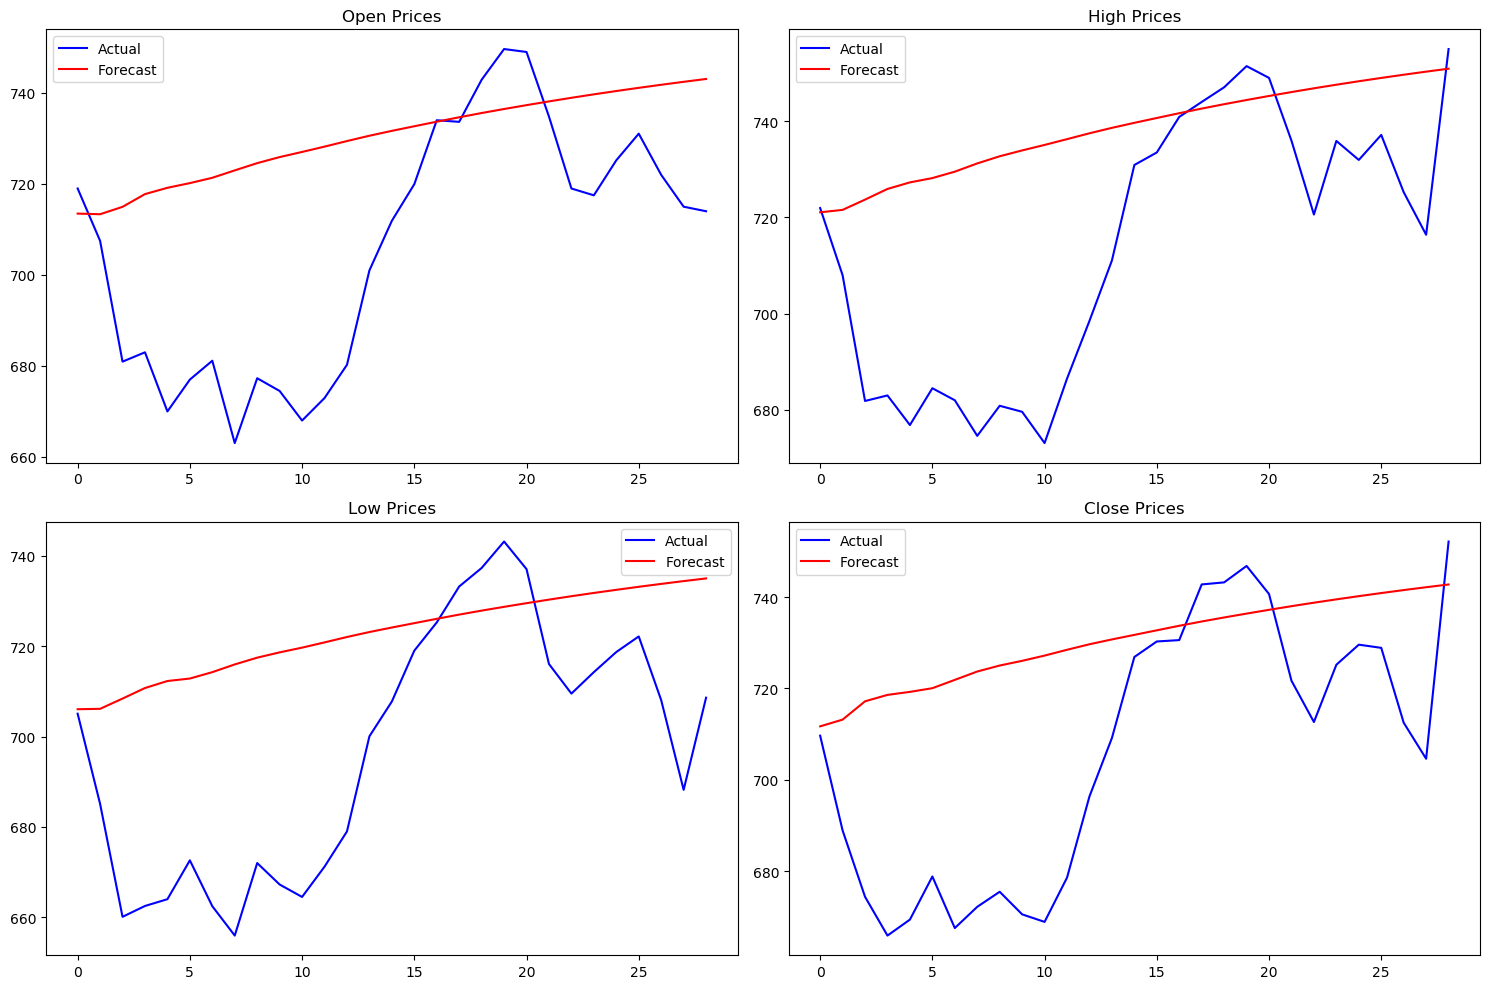

In [13]:
# Plotting results
plt.figure(figsize=(15, 10))
for i, column in enumerate(["Open", "High", "Low", "Close"], 1):
    plt.subplot(2, 2, i)
    plt.plot(test_data_inv[column], label='Actual', color='blue')
    plt.plot(forecast_df_inv[column], label='Forecast', color='red')
    plt.title(f'{column} Prices')
    plt.legend()

plt.tight_layout()
plt.show()